<a href="https://colab.research.google.com/github/jasondupree/jasondupree.github.io/blob/main/spectral_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Notebook Preparation**

## Import Libraries

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import pickle
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.linear_model import LogisticRegression, Lasso, Ridge, LassoCV, RidgeCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, roc_auc_score, accuracy_score, auc, roc_curve
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, SpectralClustering

import warnings
from sklearn.exceptions import ConvergenceWarning

# Suppress all warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

# Suppress ConvergenceWarning for this context
warnings.simplefilter('ignore', ConvergenceWarning)

## Mount Drive and Update Display

In [10]:
from google.colab import drive
drive.mount('/content/drive/')

pd.set_option('display.max_columns', None)  # Ensures all columns are displayed
pd.set_option('display.width', None)        # Utilizes the maximum width of your display

from IPython.display import display, HTML

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## Import Data

In [17]:
# Adjust the path to the location of your CSV file
file_path = '/content/drive/My Drive/Data Science Courses/Colab Notebooks/Machine Learning/Projects/HW3/returns.csv'
df_returns = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
df_returns.head(3)

,symbol,Industry,avg200603,avg200604,avg200605,avg200606,avg200607,avg200608,avg200609,avg200610,avg200611,avg200612,avg200701,avg200702,avg200703,avg200704,avg200705,avg200706,avg200707,avg200708,avg200709,avg200710,avg200711,avg200712,avg200801,avg200802,avg200803,avg200804,avg200805,avg200806,avg200807,avg200808,avg200809,avg200810,avg200811,avg200812,avg200901,avg200902,avg200903,avg200904,avg200905,avg200906,avg200907,avg200908,avg200909,avg200910,avg200911,avg200912,avg201001,avg201002,avg201003,avg201004,avg201005,avg201006,avg201007,avg201008,avg201009,avg201010,avg201011,avg201012,avg201101,avg201102,avg201103,avg201104,avg201105,avg201106,avg201107,avg201108,avg201109,avg201110,avg201111,avg201112,avg201201,avg201202,avg201203,avg201204,avg201205,avg201206,avg201207,avg201208,avg201209,avg201210,avg201211,avg201212,avg201301,avg201302,avg201303,avg201304,avg201305,avg201306,avg201307,avg201308,avg201309,avg201310,avg201311,avg201312,avg201401,avg201402,avg201403,avg201404,avg201405,avg201406,avg201407,avg201408,avg201409,avg201410,avg201411,avg201412,avg201501,avg201502,avg201503,avg201504,avg201505,avg201506,avg201507,avg201508,avg201509,avg201510,avg201511,avg201512,avg201601,avg201602
0,A,Health Care,0.039334,0.016401,-0.094683,-0.090490,-0.103653,0.135238,0.016478,0.095077,-0.061947,0.088520,-0.086311,-0.013365,0.081864,0.022006,0.108179,0.006549,-0.012144,-0.043362,0.006560,-0.004330,0.030815,-0.023214,-0.076629,-0.098530,-0.027424,0.008694,0.236423,-0.046545,0.028538,-0.037079,-0.147903,-0.243509,-0.149122,-0.150383,0.158973,-0.218857,0.131617,0.209002,-0.000547,0.106092,0.141383,0.087672,0.090550,-0.070219,0.169363,0.068043,-0.105045,0.117186,0.094177,0.049795,-0.113699,-0.115051,-0.020001,-0.049381,0.218692,0.038164,0.000572,0.161851,0.006257,0.000476,0.067652,0.111186,-0.008558,0.026712,-0.175874,-0.137632,-0.149730,0.200645,0.063566,-0.062735,0.186386,0.005301,0.020356,-0.052350,-0.031642,0.001892,-0.027912,-0.036759,0.042735,-0.064936,0.064930,0.061663,0.063316,-0.079860,0.021610,-0.009563,0.098503,-0.059370,0.038319,0.024830,0.089498,0.001183,0.052043,0.069572,0.018389,-0.020980,-0.003564,-0.038434,0.055617,0.008427,-0.028576,0.024924,-0.004368,-0.027617,0.071178,-0.040993,-0.082807,0.113720,-0.018659,-0.002171,-0.005313,-0.068791,0.052970,-0.112659,-0.027479,0.100233,0.104304,-0.008302,-0.083049,-0.000535
1,AA,Materials,0.040890,0.098826,-0.070155,0.017606,-0.095683,-0.041422,-0.025758,0.031387,0.075859,-0.038484,0.080559,0.029196,0.035768,0.042253,0.165354,-0.021739,-0.060227,-0.035714,0.074280,0.013832,-0.073706,0.001097,-0.093525,0.107632,-0.030937,-0.035348,0.168155,-0.119320,-0.043936,-0.045153,-0.288820,-0.487698,-0.090553,0.109047,-0.316020,-0.179823,0.209917,0.268533,0.012889,0.081934,0.118087,-0.010811,0.090454,-0.068857,0.000775,0.265891,-0.226472,0.027660,0.074718,-0.065976,-0.135718,-0.119862,0.107928,-0.098101,0.163304,0.074341,-0.001523,0.153549,0.045461,0.013162,0.042527,-0.044407,-0.026078,-0.046307,-0.076926,-0.152304,-0.245269,0.145583,-0.018696,-0.129910,0.137737,-0.011654,-0.022456,-0.021127,-0.117476,0.041767,-0.032001,0.009412,0.033880,-0.039174,-0.023203,0.024853,-0.004503,-0.040040,0.008288,-0.001175,0.009332,-0.080891,0.015326,-0.033836,0.042362,0.144444,0.032223,0.104990,0.093067,0.019097,0.114286,0.040154,0.011896,0.081336,0.097790,0.021525,-0.033053,0.039058,0.030393,-0.092529,-0.013863,-0.065107,-0.126437,0.039504,-0.074074,-0.110845,-0.118750,-0.037678,0.055738,-0.080330,0.045810,0.043340,-0.234244,0.210027
2,AAPL,Information Technology,-0.087448,0.107115,-0.158681,-0.042606,0.179764,0.009372,0.124141,0.078695,0.128607,-0.075698,-0.006142,-0.018438,0.104724,0.059692,0.216488,0.007928,0.090186,0.034123,0.095801,0.226975,-0.034430,0.088857,-0.323584,-0.081078,0.151578,0.189682,0.078654,-0.111057,-0.034084,0.059496,-0.342467,-0.034673,-0.127790,-0.061427,0.055595,0.007745,0.192944,0.206335,0.075833,0.045214,0.139518,0.018279,0.101617,0.018018,0.053218,0.041937,-0.098168,0.06450

In [18]:
file_path = '/content/drive/My Drive/Data Science Courses/Colab Notebooks/Machine Learning/Projects/HW3/listens.p'
# Load the data from the pickle file
with open(file_path, 'rb') as file:
    X, y = pickle.load(file)

# Part A: Predicting Listening Behavior on a Music Streaming Platform

## A.1 Data Exploration

### A.1(a): How many users and songs are there in the data?

In [42]:
# No. of Users and Songs
num_users, num_songs = X.shape

# Print Users + Song Count
print("Number of users:", num_users)
print("Number of songs:", num_songs)

Number of users: 1960
Number of songs: 990


### A.1(b): What is the maximum number of times that a user has listened to one song?

In [43]:
# Max Times One Song
max_listens = np.max(X).astype(int)

print("The maximum number of times that a single user has listened to one song is", max_listens, "times.")

The maximum number of times that a single user has listened to one song is 214 times.


### A.1(c): What percentage of users have listened to the special song?

In [44]:
# Percentage of Users Listening to Special Song
percentage_listened = (np.sum(y) / len(y)) * 100

# Round Result to Two Decimals
percentage_listened_rounded = "{:.2f}%".format(percentage_listened)

#Print Results
print("Percentage of users who have listened to the special song:", percentage_listened_rounded)

Percentage of users who have listened to the special song: 16.33%


### A.1(d): Count the number of times each song has been listened to. What’s the smallest number? The largest number? The average?

In [45]:
# Individual Song Listened to Count
song_listen_counts = np.sum(X, axis=0)

# Minimum Number of Listens
min_listens = np.min(song_listen_counts).astype(int)

# Largest Number of Listens
max_listens = np.max(song_listen_counts).astype(int)

# Average No. of Listens
average_listens = np.mean(song_listen_counts)
# Round to Two Decimal Places
average_listens_rounded = "{:.2f}".format(average_listens)

print("The smallest number of listens:", min_listens)
print("The largest number of listens:", max_listens)
print("The average number of listens:", average_listens_rounded)

The smallest number of listens: 6
The largest number of listens: 688
The average number of listens: 61.61


### A.1(e): Count the number of users that have listened to each song. What’s the smallest number? The largest number? The average? Hint: Running X > 0 checks whether each entry is greater than 0.

In [46]:
# Research
# https://www.geeksforgeeks.org/python-boolean-array-in-numpy/

# Listening Counts to Boolean Array Conversion
listened_to_songs = X > 0

# Number of Users for Each Song
user_listen_counts = np.sum(listened_to_songs, axis=0)

# Smallest No. of Users for Each Song
min_listeners = np.min(user_listen_counts)

# Largest No. of Users for Each Song
max_listeners = np.max(user_listen_counts)

# Average No. of Users for Each Song
average_listeners = np.mean(user_listen_counts)
average_listeners_rounded = "{:.2f}".format(average_listeners)

print("The smallest number of users:", min_listeners)
print("The largest number of users:", max_listeners)
print("The average number of users:", average_listeners_rounded)

The smallest number of users: 6
The largest number of users: 340
The average number of users: 32.08


### A.1(f): Count the total number of listens by each user. What’s the smallest number? The largest number? The average?

In [47]:
# Total No. of Listens Per User
total_listens_per_user = np.sum(X, axis=1)

# Smallest No. of Listens by Each User
min_listens_by_user = np.min(total_listens_per_user)

# Largest No. of Listens by Each User
max_listens_by_user = np.max(total_listens_per_user)

# Average No. of Listens by Each User
average_listens_by_user = np.mean(total_listens_per_user)
average_listens_by_user_rounded = "{:.2f}".format(average_listens_by_user)

print("The smallest number of listens:", min_listens_by_user)
print("The largest number of listens:", max_listens_by_user)
print("The average number of listens:", average_listens_by_user_rounded)


The smallest number of listens: 2.0
The largest number of listens: 293.0
The average number of listens: 31.12


### A.1(g): Count the number of songs listened to by each user. What’s the smallest number? The largest number? The average?

In [48]:
# Boolean Array for Songs Listened to At Least Once
songs_listened_by_user = X > 0

# Count No. of Songs
num_songs_per_user = np.sum(songs_listened_by_user, axis=1)

# Smallest No. of Songs
min_songs_by_user = np.min(num_songs_per_user)

# Largest No. of Songs
max_songs_by_user = np.max(num_songs_per_user)

# Average No. of Songs
average_songs_by_user = np.mean(num_songs_per_user)
average_songs_by_user_rounded = "{:.2f}".format(average_songs_by_user)

print("The smallest number of songs listened:", min_songs_by_user)
print("The largest number of songs listened:", max_songs_by_user)
print("The average number of songs listened:", average_songs_by_user_rounded)


The smallest number of songs listened: 2
The largest number of songs listened: 138
The average number of songs listened: 16.20


## A.2: Baseline (No data pre-processing)

We will treat the first 1400 rows as the training set, and the remaining rows as the test set. For each of the algorithms below, report the out-of-sample AUC and best hyperparameters chosen post cross-validation (if any).

### A.2(a): Random Forest (using default parameters)

In [49]:
# Research
# https://www.datacamp.com/tutorial/random-forests-classifier-python
# https://www.geeksforgeeks.org/random-forest-classifier-using-scikit-learn/
# https://builtin.com/data-science/random-forest-python-deep-dive
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html
# https://stackoverflow.com/questions/64590557/how-to-get-the-predict-proba-for-the-class-predicted-by-predict-in-random-fo

# Split Into Training and Testing Sets
X_train = X[:1400]
y_train = y[:1400]
X_test = X[1400:]
y_test = y[1400:]

# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier()

# Train RF Classifier
rf_classifier.fit(X_train, y_train)

# Predict Probabilities
y_probs = rf_classifier.predict_proba(X_test)[:, 1]  # Get the probabilities for the positive class

# Calculate the AUC
auc_score = roc_auc_score(y_test, y_probs)

print("Out-of-sample AUC:", auc_score)

Out-of-sample AUC: 0.7987018770457126


### A.2(b): k-NN with both k and the distance function (try euclidean, manhattan, and hamming) selected via 5-fold CV using AUC as the scoring rule.

In [50]:
# Research
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
# https://www.tutorialspoint.com/scikit_learn/scikit_learn_kneighbors_classifier.htm
# https://python-course.eu/machine-learning/k-nearest-neighbor-classifier-with-sklearn.php
# https://www.w3schools.com/python/python_ml_cross_validation.asp

# Define Model
knn = KNeighborsClassifier()

# Create Parameter Grid
param_grid = {
    'n_neighbors': range(1, 21),  # Trying Different k Values
    'metric': ['euclidean', 'manhattan', 'hamming']
}

# 5-Fold Cross Validation
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='roc_auc')

# Fit Grid Search
grid_search.fit(X_train, y_train)

# Print Best Parameters and Cross-Validation AUC
print("Optimal Parameters:", grid_search.best_params_)
print("Optimal Cross-Validation AUC:", grid_search.best_score_)

# Predict Probabilities Based on Grid Search Results
y_probs = grid_search.predict_proba(X_test)[:, 1]

# Calculate AUC on Test Data
test_auc = roc_auc_score(y_test, y_probs)
print("Test AUC:", test_auc)

Optimal Parameters: {'metric': 'manhattan', 'n_neighbors': 18}
Optimal Cross-Validation AUC: 0.7487082053859913
Test AUC: 0.7606488388145444


## A.3 Column Normalization: Repeat part A.2(b) (just k-NN), this time pre-processing the data beforehand by normalizing the columns.

In [51]:
# Research
# https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
# https://www.geeksforgeeks.org/data-pre-processing-wit-sklearn-using-standard-and-minmax-scaler/
# https://stackoverflow.com/questions/50565937/how-to-normalize-the-train-and-test-data-using-minmaxscaler-sklearn

# Normalize Columns via MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define Model
knn = KNeighborsClassifier()

# Create Parameter Grid
param_grid = {
    'n_neighbors': range(1, 21),  # Different Values for K
    'metric': ['euclidean', 'manhattan', 'hamming']
}

# # 5-Fold Cross Validation
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='roc_auc')

# Fit Grid Search on Normalized Data
grid_search.fit(X_train_scaled, y_train)

# Print Best Parameters and AUC
print("Optimal Parameters:", grid_search.best_params_)
print("Optimal Cross-Validation AUC:", grid_search.best_score_)

# Predict Probabilities Based on Normalized Grid Search Results
y_probs = grid_search.predict_proba(X_test_scaled)[:, 1]

# Calculate AUC on Test Data
test_auc = roc_auc_score(y_test, y_probs)
print("Test AUC:", test_auc)

Optimal Parameters: {'metric': 'manhattan', 'n_neighbors': 18}
Optimal Cross-Validation AUC: 0.7257678980573858
Test AUC: 0.7214824875865602


## A.4 PCA: Repeat part A.2(b) (just k-NN),

This time pre-processing the data beforehand by applying PCA with the number of components (in addition to kNN-related hyperparameters) selected via 5-fold CV and AUC for scoring. Please select appropriate ranges for all hyperparameters (the ones in the example below are only present to illustrate the correct syntax for using Pipeline).

Hint: Use a nifty feature in sklearn called the Pipeline. Import it (by running from sklearn.pipeline import Pipeline, and then run the following line of code:
pipe = Pipeline([(‘pca’,PCA()),(‘knn’,KNeighborsClassifier())])

As you can see, we create a Pipeline by giving Pipeline() a list of tuples. Each tuple contains a name, and then either a pre-processing algorithm (like PCA) or a prediction algorithm (like KNeighborsClassifier or RandomForestClassifier). The names can be anything you like (we’ll see why we need names at all in a moment).

This Pipeline, which we have called pipe (you can call it whatever you want), acts like any other prediction algorithm. It has all the functions we usually use (fit, predict, predict proba), but it represent the combination of PCA followed by k-NN. What’s extremely nice is that you can continue to use GridSearchCV, but now you can tune all of the parameters (e.g. n components for PCA and n neighbors for k-NN) simultaneously!

**Example:**

**gs = GridSearchCV(pipe,
  param grid={‘knn n neighbors’:[1,2,3,4,5],
    ‘pca n components’:[10,20,30]},
  cv=5,
  scoring=‘roc auc’)**

This grid searcher will tune n components for PCA and n neighbors for k-NN simultaneously. The names of the parameters (which are needed in the param grid argument) are gotten by taking whatever you named each step, followed by two underscores ( ), followed by the name of the original parameter.

In [75]:
# Research
# https://scikit-learn.org/stable/modules/compose.html
# https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
# https://scikit-learn.org/stable/auto_examples/compose/plot_digits_pipe.html#sphx-glr-auto-examples-compose-plot-digits-pipe-py
# https://scikit-learn.org/stable/modules/compose.html

# PCA + KNN Pipeline
pipe = Pipeline([
    ('pca', PCA()),
    ('knn', KNeighborsClassifier())
])

# Parameter Grid
param_grid = {
    'pca__n_components': [10, 20, 30, 40, 50],
    'knn__n_neighbors': range(1, 21),
    'knn__metric': ['euclidean', 'manhattan', 'hamming']
}

# 5-Fold Cross Validation
grid_search = GridSearchCV(pipe, param_grid=param_grid, cv=5, scoring='roc_auc')

# Grid Search Fit
grid_search.fit(X_train, y_train)

# Best Parameters and Score
print("Optimal Parameters:", grid_search.best_params_)
print("Optimal Cross-Validation AUC:", grid_search.best_score_)

# Predict Probabilities on Test Data
y_probs = grid_search.predict_proba(X_test)[:, 1]

# Find AUC on Test Data
test_auc = roc_auc_score(y_test, y_probs)
print("Test AUC:", test_auc)

Optimal Parameters: {'knn__metric': 'manhattan', 'knn__n_neighbors': 20, 'pca__n_components': 50}
Optimal Cross-Validation AUC: 0.7636965589905547
Test AUC: 0.7518647992696667


## A.5: PCA and Column Normalization

Repeat part A.2(b) (just k-NN), this time preprocessing the data beforehand by applying PCA (with the number of components selected via 5-fold CV) followed by column normalization.

Hint: Pipelines can have more than two steps, and StandardScaler() is a valid step.

In [53]:
# Research
# https://stackoverflow.com/questions/51459406/how-to-apply-standardscaler-in-pipeline-in-scikit-learn-sklearn
# https://www.digitalocean.com/community/tutorials/standardscaler-function-in-python
# https://stackoverflow.com/questions/40758562/can-anyone-explain-me-standardscaler
# https://stackoverflow.com/questions/73390492/what-is-the-correct-code-to-use-standardscaler-on-x-train-and-x-test-in-sklear
# https://scikit-learn.org/0.24/modules/generated/sklearn.neighbors.DistanceMetric.html

# Create a pipeline with PCA, normalization (StandardScaler), and k-NN
pipe = Pipeline([
    ('pca', PCA()),
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

# Parameter Grid
param_grid = {
    'pca__n_components': [10, 20, 30, 40, 50],
    'knn__n_neighbors': range(1, 21),
    'knn__metric': ['euclidean', 'manhattan', 'hamming']
}

# 5-Fold Cross-Validation
grid_search = GridSearchCV(pipe, param_grid=param_grid, cv=5, scoring='roc_auc')

# Grid Search Fit
grid_search.fit(X_train, y_train)

# Best Parameters and Score
print("Optimal Parameters:", grid_search.best_params_)
print("Optimal Cross-Validation AUC:", grid_search.best_score_)

# Predict Probabilities
y_probs = grid_search.predict_proba(X_test)[:, 1]

# Calculate AUC on Test Data
test_auc = roc_auc_score(y_test, y_probs)
print("Test AUC:", test_auc)

Optimal Parameters: {'knn__metric': 'manhattan', 'knn__n_neighbors': 20, 'pca__n_components': 50}
Optimal Cross-Validation AUC: 0.7495070539509776
Test AUC: 0.7347309122486696


# Part B: Clustering Stock Returns

When building portfolios of stocks, investors seek to obtain high returns while limiting their risk (i.e. variability in returns). This can be achieved by diversification – selecting stocks that show different patterns of returns. To support these decisions, we will identify clusters of stocks that exhibit similar patters.

The dataset returns.csv contains monthly returns for some S&P500 stocks from March 2006 through February 2016. Each observation (row) corresponds to a company. The variables in the dataset are described below.

| Variable   | Description |
|------------|-------------|
| `symbol`   | The company’s ticker symbol. |
| `Industry` | The industry sector under which the stock is classified. |
| `avg200603` - `avg201602` | The return for the stock during the variable’s indicated month. The variable names have the format `avgYYYYMM`, where `YYYY` is the year and `MM` is the month. For instance, the variable `avg200902` refers to February 2009. The value stored is a net increase or decrease of the end of month stock price over the stock price at the beginning of the month. For instance, a value of `0.05` means the stock had a net increase on average of 5% during the month, while a value of `-0.02` means the stock had a net decrease on average of 2% during the month. There are 120 of these variables, for the 120 months in our dataset. |


## B.1 Data Exploration

### B.1(a): How many companies are there in the Consumer Discretionary sector? In the Energy sector?

In [68]:
# Count Companies in Consumer Discretionary Sector
consumer_count = df_returns[df_returns['Industry'] == 'Consumer Discretionary'].shape[0]

# Count Companies in Energy sector
energy_count = df_returns[df_returns['Industry'] == 'Energy'].shape[0]

# Print Results
print("Number of companies in the Consumer Discretionary sector:", consumer_count)
print("Number of companies in the Energy sector:", energy_count)

Number of companies in the Consumer Discretionary sector: 69
Number of companies in the Energy sector: 38


### B.1(b): Entering the “Great Recession” of 2008-2009, most stocks lost significant value, but some sectors were hit harder than others. Select a few sectors and plot the average stock return between 01/2008 and 12/2010. In your opinion, is industry information sufficient for investors to build a portfolio diversification strategy?

Unique Industry Sectors: ['Health Care' 'Materials' 'Information Technology' 'Consumer Staples'
 'Utilities' 'Financials' 'Consumer Discretionary' 'Energy' 'Industrials'
 'Telecommunications Services']


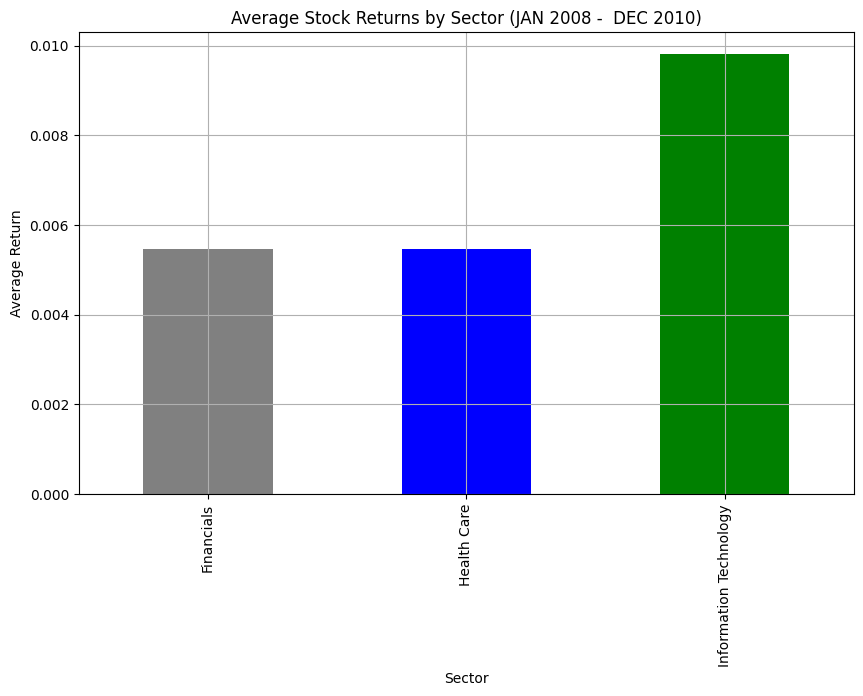

In [69]:
# Print Unique Industry Sectors
print("Unique Industry Sectors:", df_returns['Industry'].unique())

# Define Timeframe for Analysis
start_date = '200801'
end_date = '201012'
sectors = ['Financials', 'Information Technology', 'Health Care'] # Sectors Chosen

# Filter on Correct Timeframe and Calculate Results
date_columns = [col for col in df_returns.columns if start_date <= col[-6:] <= end_date]
df_returns['Avg_Return'] = df_returns[date_columns].mean(axis=1)

# Group by Sector and Calc AVG Rate of Return
sector_avg_returns = df_returns[df_returns['Industry'].isin(sectors)].groupby('Industry')['Avg_Return'].mean()

# Plot Results
plt.figure(figsize=(10, 6))
sector_avg_returns.plot(kind='bar', color=['grey', 'blue', 'green'])
plt.title('Average Stock Returns by Sector (JAN 2008 -  DEC 2010)')
plt.xlabel('Sector')
plt.ylabel('Average Return')
plt.grid(True)
plt.show()

#### There is quite a bit of variation between industries, suggesting that it can be used to build a portfolio-diversification strategy. However, this doesn't account for correlation within industries. For example, during an industry-wide downturn in technology, this downturn could also impact health care and/or financials, and as a consequence, make diversification irrelevant.

## B.2 k-Means Clustering

### B.2(a): Cluster the stocks into 4 clusters according to their monthly returns. Do not normalize the data beforehand. Plot the centroids of the 4 clusters (each centroid is a time series, so it can be plotted with time on the horizontal axis, and return on the vertical axis).

cluster
0    166
1     52
2     45
3    170
Name: count, dtype: int64


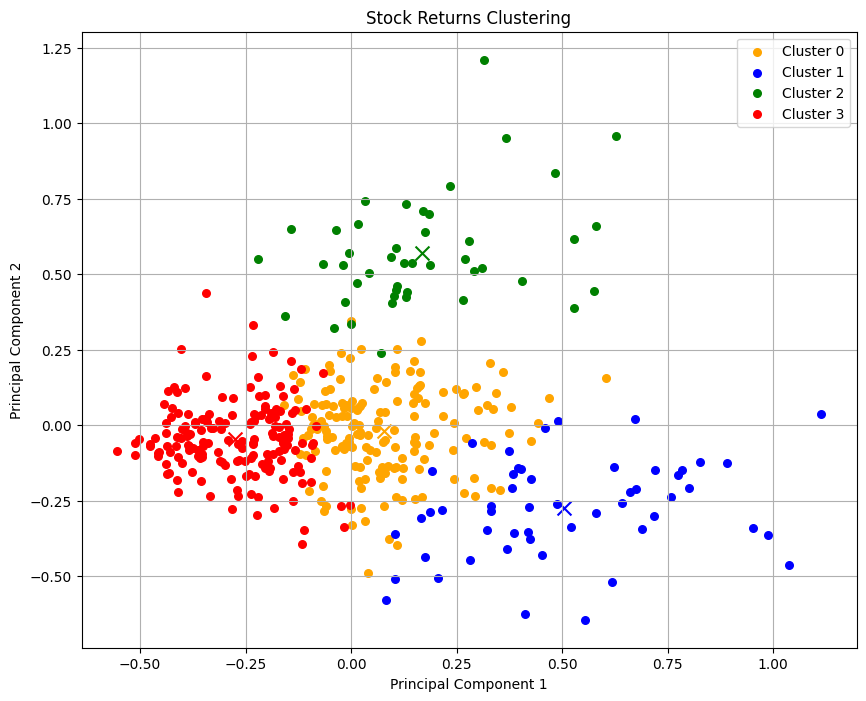

In [70]:
# Research
# https://medium.com/analytics-vidhya/implementation-of-principal-component-analysis-pca-in-k-means-clustering-b4bc0aa79cb6
# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
# https://www.kdnuggets.com/2023/05/principal-component-analysis-pca-scikitlearn.html
# https://stackoverflow.com/questions/52290175/what-does-fit-transform-and-fit-transform-do-in-pca-available-in-sklearn-decom

# Select Average Columns
return_columns = [col for col in df_returns.columns if col.startswith('avg')]

# Execute k-means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
df_returns['cluster'] = kmeans.fit_predict(df_returns[return_columns])

# Print Companies in Each Cluster
print(df_returns['cluster'].value_counts().sort_index())

# Reduce Dimensionality to 2D Using Principal Component Analysis (PCA)
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df_returns[return_columns])

# Create New DataFrame on Reduced Dimensionality
df_reduced = pd.DataFrame(reduced_data, columns=['PC1', 'PC2'])
df_reduced['cluster'] = df_returns['cluster']

# Secure Centroids and Transform via PCA
centroids_reduced = pca.transform(kmeans.cluster_centers_)

# Plot Results
plt.figure(figsize=(10, 8))
colors = ['orange', 'blue', 'green', 'red']
for i in range(4):
    # Plot data points that are in the cluster i
    plt.scatter(df_reduced[df_reduced['cluster'] == i]['PC1'],
                df_reduced[df_reduced['cluster'] == i]['PC2'],
                s=30, c=colors[i], label=f'Cluster {i}')

    # Plot the centroid for cluster i
    plt.scatter(centroids_reduced[i, 0], centroids_reduced[i, 1],
                s=100, c=colors[i], marker='x')

plt.title('Stock Returns Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

### B.2(b): Try multiple values of k and plot a Scree plot.

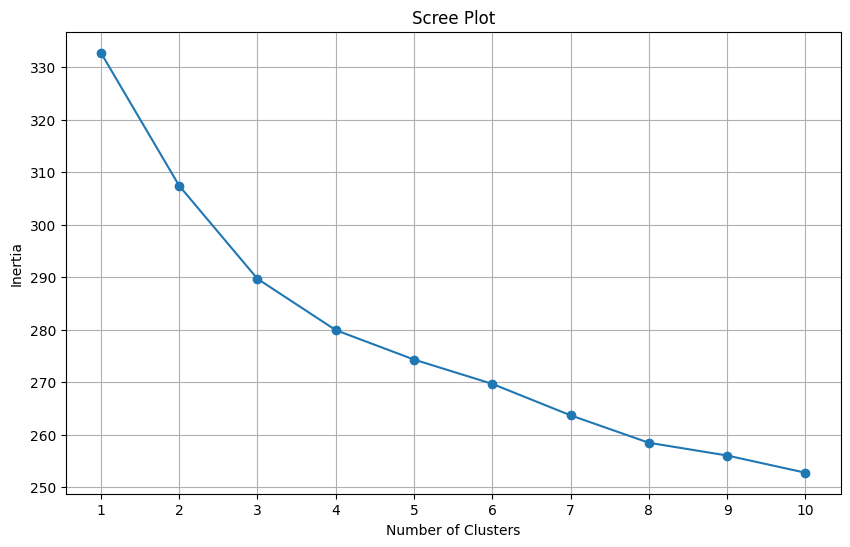

In [71]:
# Research
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
# https://realpython.com/k-means-clustering-python/
# https://www.datacamp.com/tutorial/k-means-clustering-python
# https://medium.com/analytics-vidhya/implementation-of-principal-component-analysis-pca-in-k-means-clustering-b4bc0aa79cb6

# Calculate Cluster Inertia Based on k Sampling 1-10
inertia = []
k_values = range(1, 11)

# Append Results
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(df_returns[return_columns])
    inertia.append(kmeans.inertia_)

# Plot the Scree Plot
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o')
plt.title('Scree Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()

### B.2(c): What do you think is a reasonable number of clusters?

Based on the above, it could be argued that k=3 or k=4 are both reasonable. I would argue that a bit more precision could be useful here and side with 4 clusters.

### B.2(d): For your chosen number of clusters, compute the number of companies in each cluster and the number of companies per industry sector in each cluster.

In [72]:
# K-means Clustering Using 4 Clusters
kmeans = KMeans(n_clusters=4, n_init=10, random_state=42)
clusters = kmeans.fit_predict(df_returns[return_columns])

# Add Assignments to DataFrame
df_returns['cluster'] = clusters

# Compute No. of Companies by Cluster
co_counts_per_cluster = df_returns['cluster'].value_counts().sort_index()

# No. of Companies by Industry
ind_counts_per_cluster = df_returns.groupby(['cluster', 'Industry']).size().unstack(fill_value=0)

# Print Results
print("Number of companies in each cluster:")
print(co_counts_per_cluster)
print("\nNumber of companies per industry sector in each cluster:")
print(ind_counts_per_cluster)

Number of companies in each cluster:
cluster
0    166
1     52
2     45
3    170
Name: count, dtype: int64

Number of companies per industry sector in each cluster:
Industry  Consumer Discretionary  Consumer Staples  Energy  Financials  Health Care  Industrials  \
cluster                                                                                            
0                             41                 5       2          24            8           34   
1                             13                 0       0          31            1            3   
2                              0                 0      33           0            0            3   
3                             15                27       3          23           35           15   

Industry  Information Technology  Materials  Telecommunications Services  Utilities  
cluster                                                                              
0                             43          9                   

| Cluster | Consumer Discretionary | Consumer Staples | Energy | Financials | Health Care | Industrials | Information Technology | Materials | Telecommunications Services | Utilities |
|---------|------------------------|------------------|--------|------------|-------------|-------------|------------------------|-----------|------------------------------|-----------|
| 0       | 41                     | 5                | 2      | 24         | 8           | 34          | 43                     | 9         | 0                            | 0         |
| 1       | 13                     | 0                | 0      | 31         | 1           | 3           | 0                      | 4         | 0                            | 0         |
| 2       | 0                      | 0                | 33     | 0          | 0           | 3           | 0                      | 7         | 1                            | 0         |
| 3       | 15                     | 27               | 3      | 23         | 35          | 15          | 13                     | 8         | 4                            | 27        |

### B.2(e): What was the average return for the worst cluster (as measured by returns) in October 2008? And the average return for the best cluster in March 2009?

In [73]:
# Research
# https://www.w3schools.com/python/pandas/ref_df_idxmin.asp

# Calculate October Average Return by Cluster
october_returns = df_returns.groupby('cluster')['avg200810'].mean()

# Identify Worst Cluster
worst_cluster_oct_2008 = october_returns.idxmin()
worst_cluster_return_oct_2008 = october_returns.min()

# Calculate Average Cluster
march_returns = df_returns.groupby('cluster')['avg200903'].mean()

# Identify Best CLuster in March 2009
best_cluster_mar_2009 = march_returns.idxmax()
best_cluster_return_mar_2009 = march_returns.max()

# Print Results
print(f"The worst cluster in October 2008 was Cluster {worst_cluster_oct_2008} with an average return of {worst_cluster_return_oct_2008:.2f}.")
print(f"The best cluster in March 2009 was Cluster {best_cluster_mar_2009} with an average return of {best_cluster_return_mar_2009:.2f}.")

The worst cluster in October 2008 was Cluster 1 with an average return of -0.32.
The best cluster in March 2009 was Cluster 1 with an average return of 0.24.


## B.3 Spectral Clustering

### B.3(a): Spectral clustering will require us to input similarities for each pair of stocks. The most natural notion of similarity in this context is probably correlation (the same correlation from your statistics course). Why will correlations not work directly as the similarities for spectral clustering?

#### Correlations cannot be used directly as similarities for spectral clustering because they can include negative values, which imply dissimilarity, and they only capture linear relationships, whereas spectral clustering is capable of identifying complex non-linear structures.

### B.3(b): Propose a modification to correlation so that it can be used as the similarities for spectral clustering (there are many correct answers).

#### I was considering exponential transformation (e.g., exp(-1 * (1 - correlation) / (2 * sigma^2)), ) but decised to go with taking the absolute value of the correlation coefficients. This approach should make all negative values positive while still ensuring the strength of the relationship remains in tact.

### B.3(c): Run spectral clustering using your similarity from (b). Use the same number of clusters you chose in B.2c.

Hint: The correlations of the columns of a pandas DataFrame df can be computed
with df.corr(). Or if you prefer numpy arrays, the correlations of the columns of a 2-D numpy array X can be computed with np.corrcoef(X, rowvar=False). (Setting the argument rowvar to True will compute the correlations of the rows of X).

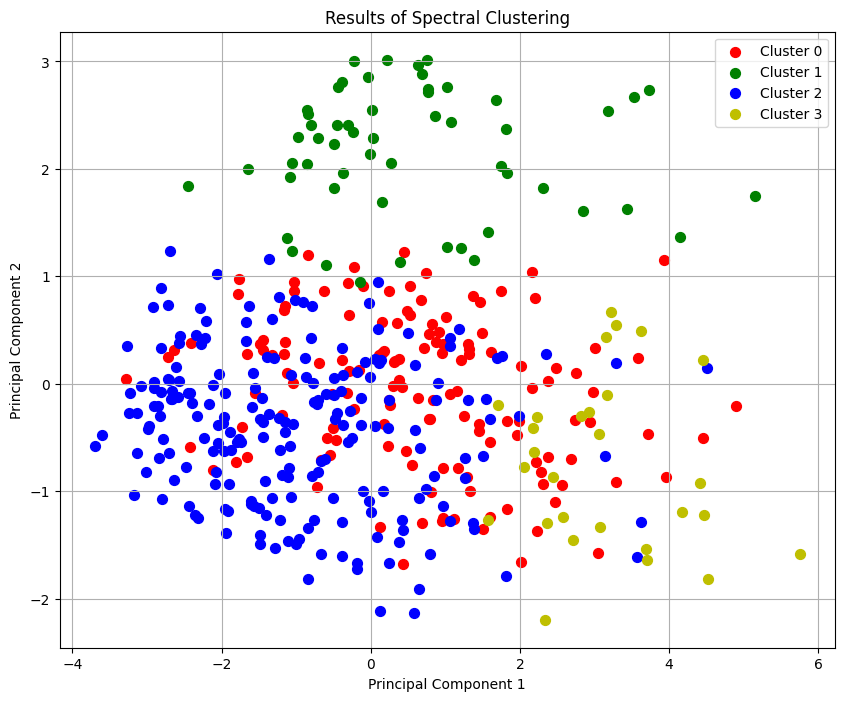

Number of companies in each cluster:
Cluster 0: 141
Cluster 1: 55
Cluster 2: 209
Cluster 3: 28


In [74]:
# Filter on Average Columns
return_columns = [col for col in df_returns.columns if col.startswith('avg')]

# Compute Corr Matrix
correlation_matrix = df_returns[return_columns].transpose().corr()

# Use ABS Value from Corr Matrix
similarity_matrix = np.abs(correlation_matrix)

# Spectral Clustering
n_clusters = 4
spectral_cluster = SpectralClustering(n_clusters=n_clusters, affinity='precomputed', random_state=42)
clusters = spectral_cluster.fit_predict(similarity_matrix)

# Apply PCA to Corr Matrix
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(correlation_matrix)

# Plot Results
plt.figure(figsize=(10, 8))
colors = ['r', 'g', 'b', 'y']

for i in range(n_clusters):
    cluster_data = reduced_data[clusters == i]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], s=50, c=colors[i], label=f'Cluster {i}')

plt.title('Results of Spectral Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

# Print No. of Companies by Cluster
print("Number of companies in each cluster:")
for i in range(n_clusters):
    print(f"Cluster {i}: {sum(clusters == i)}")

### B.3(d): In what ways are the clusters similar vs. different across this model and your model from B.2?

#### **Similarities:**

*   The general groupings are roughly equivalent.
*   Spectral Cluster 1 is roughly equivalent to cluster 2 in the k-means version.

**Differences:**

*   K-means has distinct clusters and can easily be delineated whereas spectral clustering has significant more overlap. This is due to spectral clustering excelling at detecting clusters with complex shapes in high-dimensional spaces.
*   K-means cluster 1 and the spectral clustering equivalent cluster 3 have different assignments where it appears spectral clustering assigned less - 52 companies vs 28.